In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
%matplotlib inline

In [2]:
#datasets paths'
ENEM_FILE_PATH = '/Users/kizzyterra/Workspace/analise-dados/projetos/dados/microdados-enem-2018/DADOS/MICRODADOS_ENEM_2018.csv'
MUNICIPIOS_FILE_PATH = '/Users/kizzyterra/Workspace/analise-dados/projetos/dados/brasil-municipios.csv'
IDHM_FILE_PATH = '/Users/kizzyterra/Workspace/analise-dados/projetos/dados/idhm/atlas2013_dadosbrutos_idhm_pt.csv'

In [3]:
microdados_enem_best_features = ['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA',
       'CO_UF_RESIDENCIA',  'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO', 
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006','Q007', 'Q008', 'Q009', 'Q010', 
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 
       'Q021', 'Q022','Q023', 'Q024', 'Q025', 'Q026', 'Q027',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [4]:
#Criando dataframes
microdados_enem = pd.read_csv(ENEM_FILE_PATH, sep=";", encoding='ISO-8859-1', usecols=microdados_enem_best_features)
municipios = pd.read_csv(MUNICIPIOS_FILE_PATH)

In [5]:
microdados_enem.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,5300108,53,DF,44.0,M,1.0,1,0,NaN,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2111102,21,MA,23.0,F,0.0,3,1,2111102.0,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,3530607,35,SP,23.0,F,0.0,1,1,4209300.0,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2916401,29,BA,26.0,F,0.0,3,2,NaN,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2918100,29,BA,20.0,M,0.0,0,1,2800308.0,...,A,B,A,A,B,A,B,B,B,A


In [6]:
municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


In [7]:
microdados_enem.describe()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
count,5.513747e+06,5.513747e+06,5.513747e+06,5.513650e+06,5.296110e+06,5.513747e+06,5.513747e+06,5.327964e+06,5.327964e+06,5.513747e+06,5.513747e+06,5.513747e+06,5.513747e+06,3.905099e+06,4.148264e+06,4.148264e+06,3.905099e+06,4.148264e+06,5.513747e+06
mean,1.800104e+11,3.114727e+06,3.099416e+01,2.237222e+01,1.197082e-01,2.126976e+00,1.038818e+00,3.082742e+06,3.067302e+01,1.539053e+00,3.004955e+00,1.348237e+00,9.570787e-02,4.936833e+02,5.680977e+02,5.264538e+02,5.354056e+02,5.086806e+02,3.896592e+00
std,1.917637e+06,9.930315e+05,9.901276e+00,7.594597e+00,3.752605e-01,1.017869e+00,2.324415e-01,9.758309e+05,9.724860e+00,7.202551e-01,4.001611e+00,7.112007e-01,2.941902e-01,7.416583e+01,8.141996e+01,7.349787e+01,1.031512e+02,1.874965e+02,1.508600e+00
min,1.800072e+11,1.100015e+06,1.100000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100015e+06,1.100000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.800088e+11,2.408102e+06,2.400000e+01,1.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.408003e+06,2.400000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.358000e+02,5.098000e+02,4.759000e+02,4.553000e+02,3.600000e+02,3.000000e+00
50%,1.800104e+11,3.136702e+06,3.100000e+01,1.900000e+01,0.000000e+00,2.000000e+00,1.000000e+00,3.123205e+06,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.834000e+02,5.822000e+02,5.313000e+02,5.166000e+02,5.200000e+02,4.000000e+00
75%,1.800120e+11,3.550308e+06,3.500000e+01,2.400000e+01,0.000000e+00,3.000000e+00,1.000000e+00,3.550308e+06,3.500000e+01,2.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00,5.423000e+02,6.281000e+02,5.797000e+02,6.007000e+02,6.200000e+02,5.000000e+00
max,1.800140e+11,5.300108e+06,5.300000e+01,9.800000e+01,3.000000e+00,5.000000e+00,4.000000e+00,5.300108e+06,5.300000e+01,4.000000e+00,1.200000e+01,4.000000e+00,1.000000e+00,8.696000e+02,8.504000e+02,8.169000e+02,9.961000e+02,1.000000e+03,2.000000e+01


Aplicando as estratégis explicadas no notebook: *Seleção de Características dos Microdados ENEM*

In [8]:
microdados_enem['TP_ESTADO_CIVIL'] = microdados_enem['TP_ESTADO_CIVIL'].fillna(4)
microdados_enem = microdados_enem.dropna(subset=['NU_IDADE'])
microdados_enem['CO_MUNICIPIO_NASCIMENTO'].fillna(microdados_enem['CO_MUNICIPIO_RESIDENCIA'], inplace = True)
microdados_enem['CO_UF_NASCIMENTO'].fillna(microdados_enem['CO_UF_RESIDENCIA'], inplace = True)
microdados_enem = microdados_enem.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                         'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
microdados_enem = microdados_enem.dropna(subset=['Q026'])

In [9]:
microdados_enem = microdados_enem.dropna(subset=['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

Adicionando as colunas calculadas a partir das notas:

In [10]:
med_weights_usp = {"CN": 2.0, "CH": 2.0, "LC": 4.0, "MT":3.0 , "REDACAO":  2.0, "TOTAL": 13.0}
med_cuts_usp = {"AC" : 858.44, "EP": 793.29, "PPI": 767.15}
med_weights_ufrj = {"CN": 2.0, "CH": 1.0, "LC": 2.0, "MT":1.0 , "REDACAO":  3.0, "TOTAL": 9.0}
med_cuts_ufrj = {"AC" : 822.46, "EP": 805.53}

eng_weights_ufrj = {"CN": 4.0, "CH": 2.0, "LC": 2.0, "MT":4.0 , "REDACAO":  3.0, "TOTAL": 15.0}
eng_cuts_ufrj = {"AC" : 774.29, "EP": 664.61}

dir_weights_ufrj = {"CN": 1.0, "CH": 2.0, "LC": 2.0, "MT":1.0 , "REDACAO":  3.0, "TOTAL": 8.0}
dir_cuts_ufrj = {"AC" : 789.17, "EP": 771.61}

In [11]:
microdados_enem['MEAN'] = (microdados_enem.NU_NOTA_CN+ microdados_enem.NU_NOTA_CH+ microdados_enem.NU_NOTA_LC + microdados_enem.NU_NOTA_MT + microdados_enem.NU_NOTA_REDACAO)/5

microdados_enem['DIR_UFRJ'] = (microdados_enem.NU_NOTA_CN*dir_weights_ufrj['CN'] + microdados_enem.NU_NOTA_CH*dir_weights_ufrj['CH'] + \
              microdados_enem.NU_NOTA_LC*dir_weights_ufrj['LC'] + microdados_enem.NU_NOTA_MT*dir_weights_ufrj['MT'] + \
              microdados_enem.NU_NOTA_REDACAO*dir_weights_ufrj['REDACAO'])/dir_weights_ufrj['TOTAL']

microdados_enem['ENG_UFRJ'] = (microdados_enem.NU_NOTA_CN*eng_weights_ufrj['CN'] + microdados_enem.NU_NOTA_CH*eng_weights_ufrj['CH'] + \
              microdados_enem.NU_NOTA_LC*eng_weights_ufrj['LC'] + microdados_enem.NU_NOTA_MT*eng_weights_ufrj['MT'] + \
              microdados_enem.NU_NOTA_REDACAO*eng_weights_ufrj['REDACAO'])/eng_weights_ufrj['TOTAL']
microdados_enem['MED_UFRJ'] = (microdados_enem.NU_NOTA_CN*med_weights_ufrj['CN'] + microdados_enem.NU_NOTA_CH*med_weights_ufrj['CH'] + \
              microdados_enem.NU_NOTA_LC*med_weights_ufrj['LC'] + microdados_enem.NU_NOTA_MT*med_weights_ufrj['MT'] + \
              microdados_enem.NU_NOTA_REDACAO*med_weights_ufrj['REDACAO'])/med_weights_ufrj['TOTAL']
microdados_enem['MED_UFRJ_AC_LABEL'] = microdados_enem['MED_UFRJ'].map(lambda x: 1 if x >= med_cuts_ufrj['AC'] else 0)
microdados_enem['MED_UFRJ_EP_LABEL'] = microdados_enem['MED_UFRJ'].map(lambda x: 1 if x >= med_cuts_ufrj['EP'] else 0)

microdados_enem['MED_USP'] = (microdados_enem.NU_NOTA_CN*med_weights_usp['CN'] + microdados_enem.NU_NOTA_CH*med_weights_usp['CH'] + \
              microdados_enem.NU_NOTA_LC*med_weights_usp['LC'] + microdados_enem.NU_NOTA_MT*med_weights_usp['MT'] + \
              microdados_enem.NU_NOTA_REDACAO*med_weights_usp['REDACAO'])/med_weights_usp['TOTAL']
microdados_enem['MED_USP_AC_LABEL'] = microdados_enem['MED_USP'].map(lambda x: 1 if x >= med_cuts_usp['AC'] else 0)
microdados_enem['MED_USP_EP_LABEL'] = microdados_enem['MED_USP'].map(lambda x: 1 if x >= med_cuts_usp['EP'] else 0)
microdados_enem['MED_USP_PPI_LABEL'] = microdados_enem['MED_USP'].map(lambda x: 1 if x >= med_cuts_usp['PPI'] else 0)

In [12]:
microdados_enem['MEAN_GROUPS'] = pd.cut(microdados_enem.MEAN, bins=5, labels=[0,1,2,3,4])

In [13]:
microdados_enem.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,...,DIR_UFRJ,ENG_UFRJ,MED_UFRJ,MED_UFRJ_AC_LABEL,MED_UFRJ_EP_LABEL,MED_USP,MED_USP_AC_LABEL,MED_USP_EP_LABEL,MED_USP_PPI_LABEL,MEAN_GROUPS
1,180007197856,2111102,21,MA,23.0,F,0.0,3,1,2111102.0,...,500.6125,467.253333,439.688889,0,0,479.438462,0,0,0,2
5,180007239581,2507507,25,PB,23.0,F,0.0,1,1,2507507.0,...,600.2750,520.266667,522.222222,0,0,515.015385,0,0,0,3
7,180008090447,2207702,22,PI,39.0,M,1.0,3,1,2205706.0,...,726.2375,633.946667,627.333333,0,0,639.015385,0,0,0,3
8,180008257068,2304400,23,CE,19.0,M,0.0,3,1,2304400.0,...,455.1000,416.880000,402.533333,0,0,424.692308,0,0,0,2
9,180008202044,5103403,51,MT,25.0,F,0.0,3,1,2903201.0,...,716.0500,580.853333,616.400000,0,0,593.984615,0,0,0,3


In [14]:
microdados_enem_geo = pd.merge(microdados_enem, municipios[['codigo_ibge', 'latitude', 'longitude']], 
                               how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['codigo_ibge'])

## 1. Distirbuição dos Estudantes por Município

/Users/kizzyterra/Workspace/enem-project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """


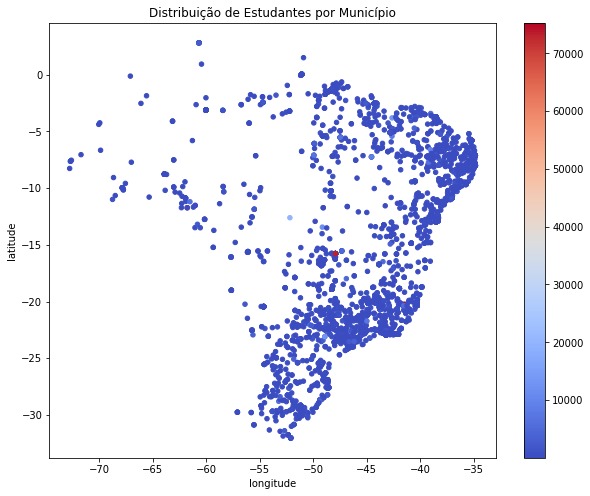

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

c_municipio = microdados_enem_geo.groupby('CO_MUNICIPIO_RESIDENCIA').count().NU_INSCRICAO

microdados_enem_geo.loc[microdados_enem_geo.CO_MUNICIPIO_RESIDENCIA.unique()].plot.scatter(
                                                           x='longitude', y='latitude',  
                                                           c=c_municipio,
                                                           cmap='coolwarm', 
                                                           title='Distribuição de Estudantes por Município', ax=ax)

In [16]:
# fig, ax = plt.subplots(1,1, figsize=(10,8))

# c_municipio_mean = microdados_enem.MEAN

# microdados_enem_geo.plot.scatter(x='longitude', y='latitude',  
#                                  c=c_municipio_mean,
#                                  cmap='coolwarm', 
#                                  title='Média dos alunos por município', ax=ax)

## 2.Quem são os estudantes que fizeram o ENEM em 2018?

### 2.1 Distribuição por Sexo

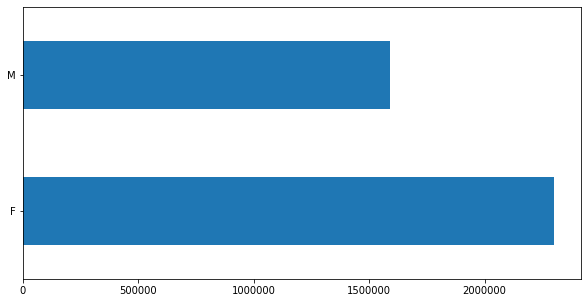

In [17]:
plt.figure(figsize=(10,5))
microdados_enem.TP_SEXO.value_counts().plot(kind='barh')

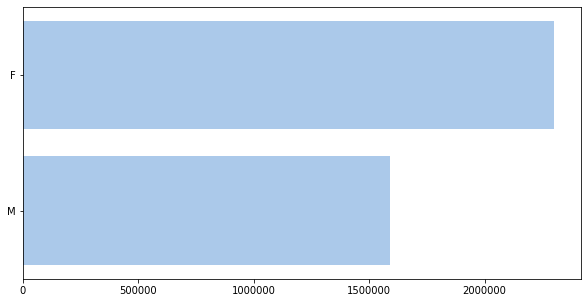

In [45]:
# Initialize the matplotlib figure
plt.figure(figsize=(10,5))
sexo = microdados_enem.TP_SEXO.value_counts()
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=sexo.index, x=sexo.values, color="b")

In [19]:
enem_sexo = (microdados_enem.TP_SEXO.value_counts()/10000).to_dict()

In [20]:
enem_sexo

{'F': 230.1476, 'M': 159.2191}

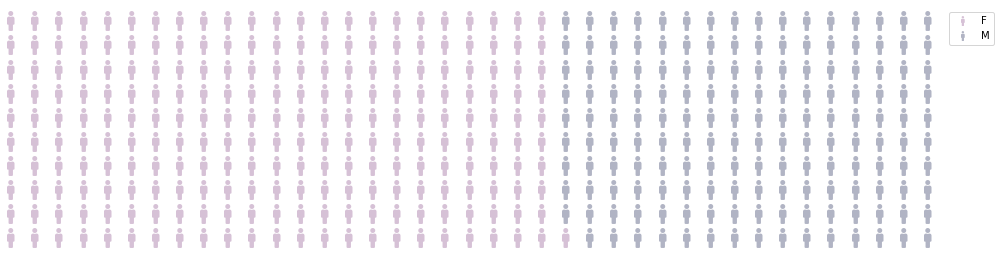

In [21]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10,  
    values = enem_sexo, 
    colors = (  "#d6c1d6", "#b1b4c4" ),
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='male', 
    font_size=20, 
    icon_legend=True,
    figsize=(14, 6)
)

### 2.2 Distribuição por Idade

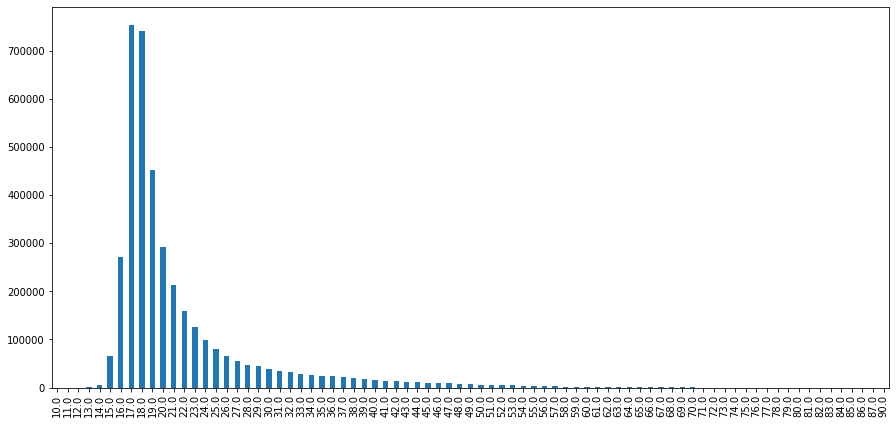

In [22]:
plt.figure(figsize=(15,7))
microdados_enem.NU_IDADE.value_counts(sort=False).plot(kind='bar')

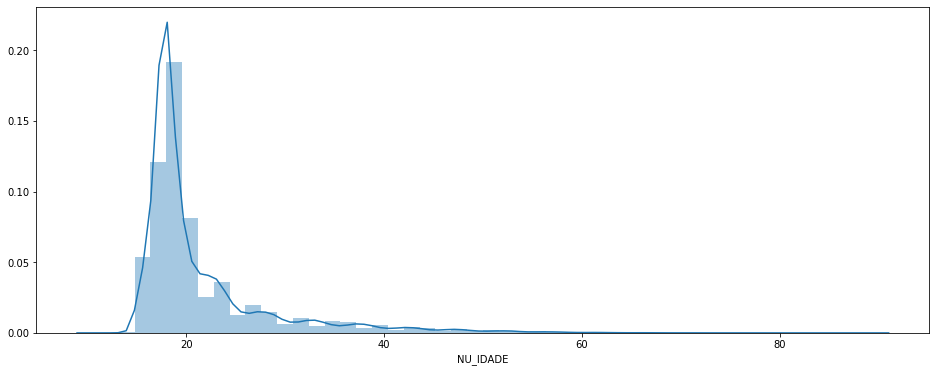

In [23]:
plt.figure(figsize=(16, 6))
sns.distplot(microdados_enem['NU_IDADE'])

### 2.3 Distribuição por Raça

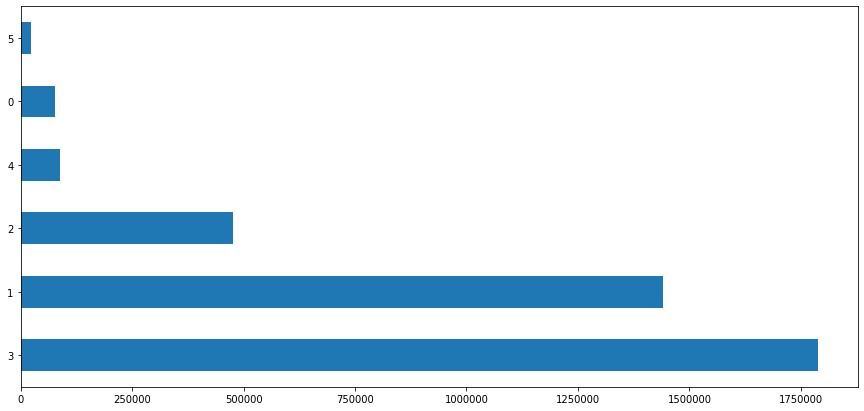

In [24]:
plt.figure(figsize=(15,7))
microdados_enem.TP_COR_RACA.value_counts().plot(kind='barh')

### 2.4 Distribuição por Tipo de Escola

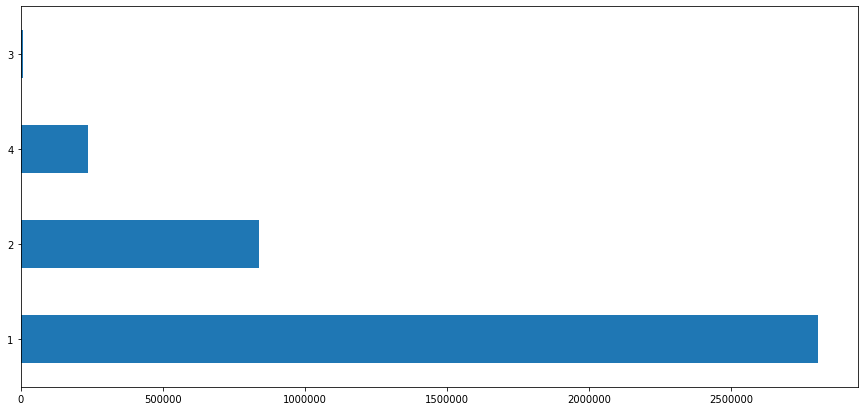

In [25]:
plt.figure(figsize=(15,7))
microdados_enem.TP_ESCOLA.value_counts().plot(kind='barh')

### 2.5 Distribuição por Estado

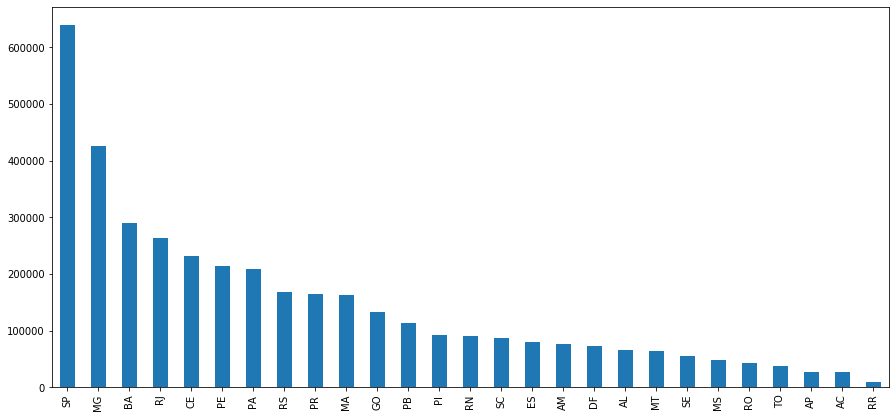

In [26]:
plt.figure(figsize=(15,7))
microdados_enem.SG_UF_RESIDENCIA.value_counts().plot(kind='bar')

### 2.6 Distribuição por Notas

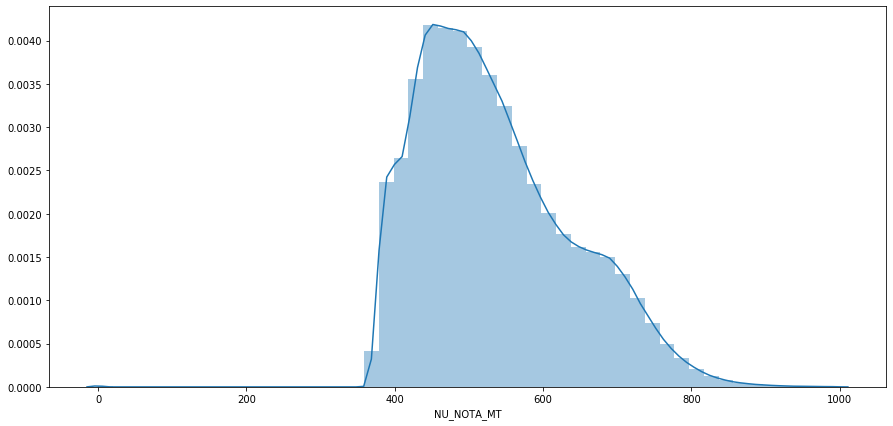

In [27]:
plt.figure(figsize=(15, 7))
sns.distplot(microdados_enem['NU_NOTA_MT'])

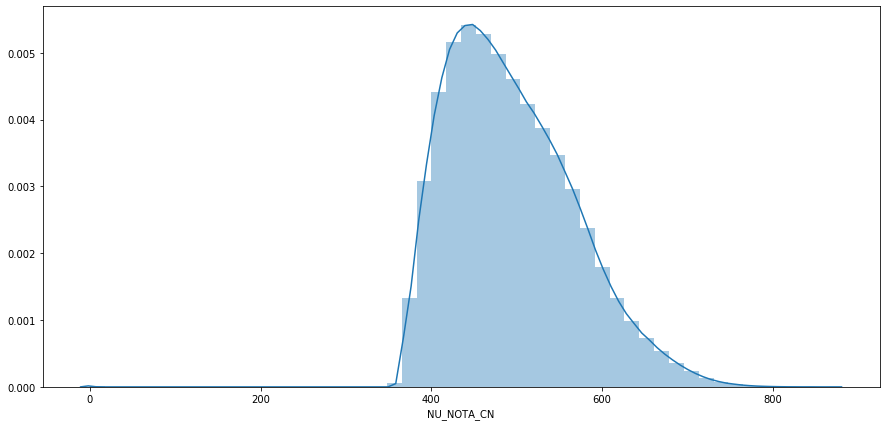

In [28]:
plt.figure(figsize=(15, 7))
sns.distplot(microdados_enem['NU_NOTA_CN'])

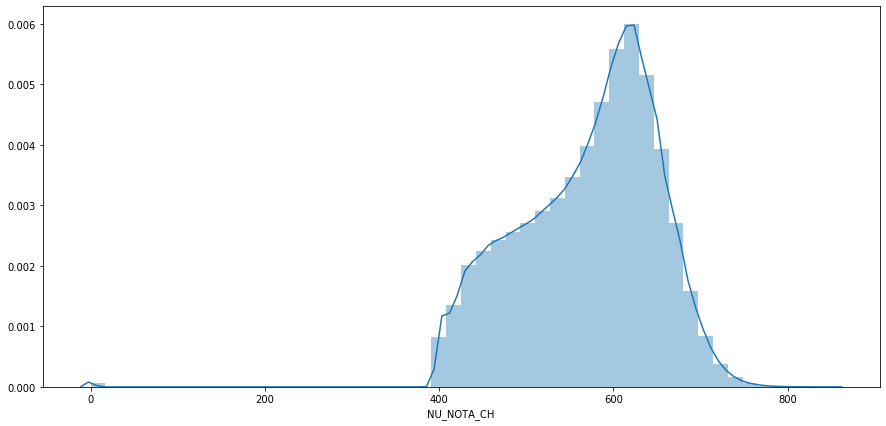

In [29]:
plt.figure(figsize=(15, 7))
sns.distplot(microdados_enem['NU_NOTA_CH'])

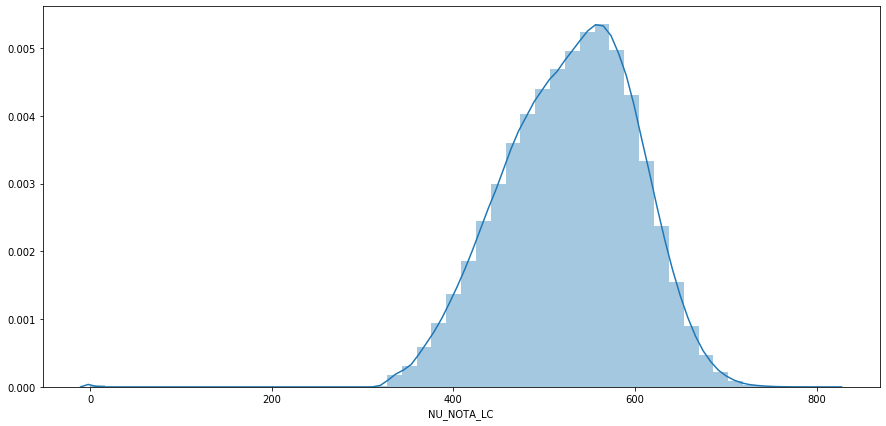

In [30]:
plt.figure(figsize=(15, 7))
sns.distplot(microdados_enem['NU_NOTA_LC'])

## 3. Analisando as características relevantes identificadas com os métodos do notebook: *Seleção de Características dos Microdados ENEM*

### 3.1 Q002 - Qual a escolaridade da sua mãe ou mulher responsável?

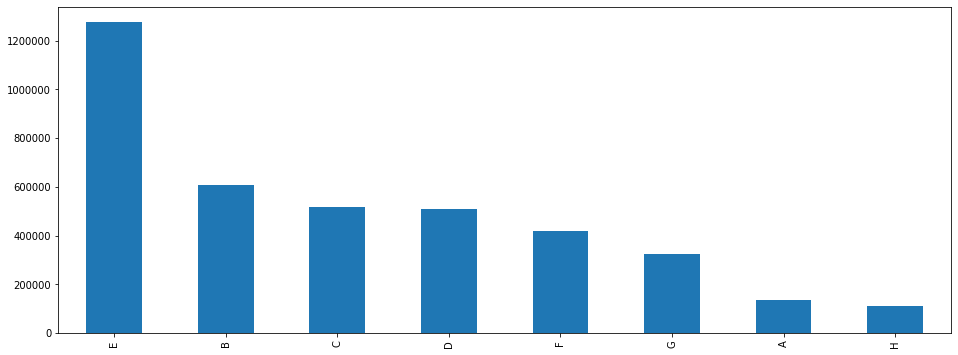

In [31]:
plt.figure(figsize=(16, 6))
microdados_enem.Q002.value_counts().plot(kind='bar')

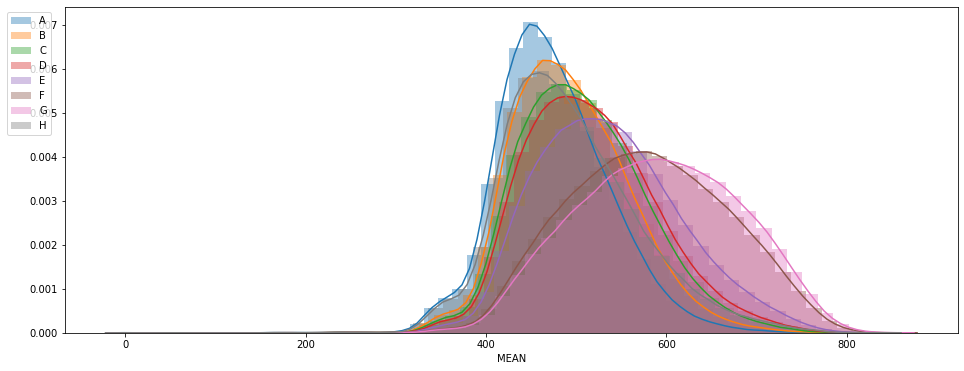

In [46]:
plt.figure(figsize=(16, 6))
questao = microdados_enem.Q002
classes = sorted(microdados_enem.Q002.unique())
for classe_mae in classes:
    sns.distplot(microdados_enem[questao == classe_mae].MEAN, label=classe_mae)
plt.legend(bbox_to_anchor=(-0.01,1), loc='upper right')

### 3.2 Q006 - Qual a renda mensal da sua família?

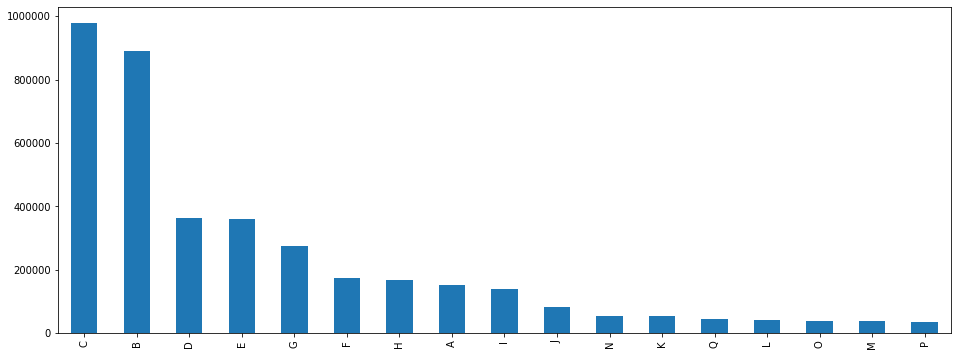

In [36]:
plt.figure(figsize=(16, 6))
microdados_enem.Q006.value_counts().plot(kind='bar')

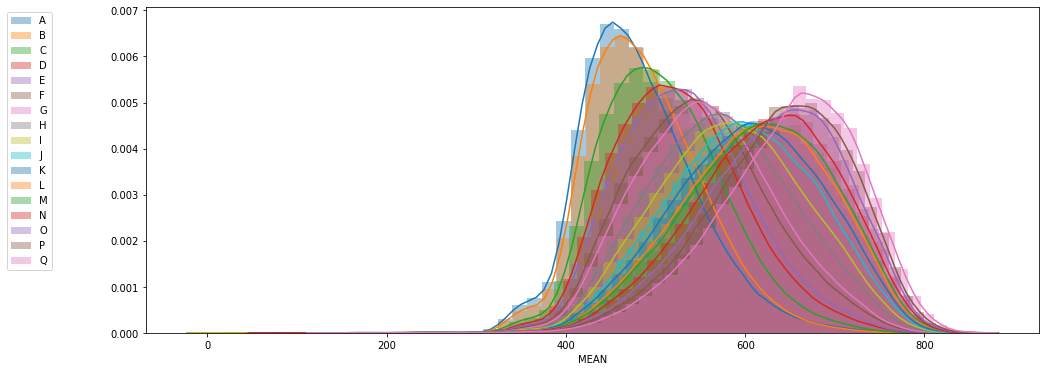

In [44]:
plt.figure(figsize=(16, 6))
questao = microdados_enem.Q006
classes = sorted(microdados_enem.Q006.unique())
for classe_renda in classes:
    sns.distplot(microdados_enem[questao == classe_renda].MEAN, label=classe_renda)
plt.legend(bbox_to_anchor=(-0.1,1), loc='upper right')

### 3.3 Q027 - Que tipo de escola você estudou?

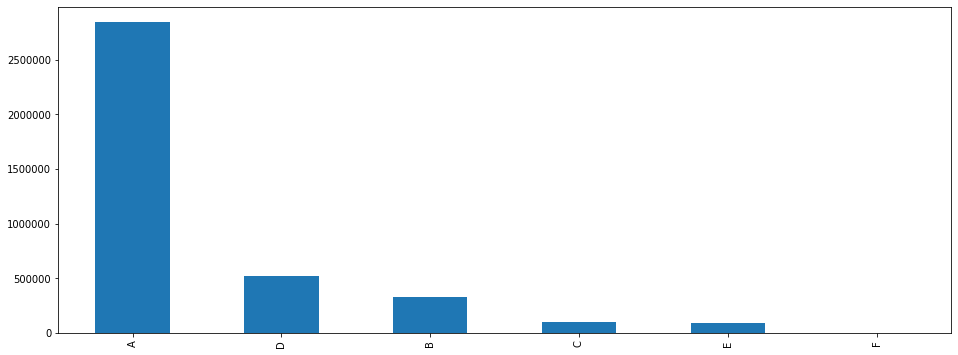

In [40]:
plt.figure(figsize=(16, 6))
microdados_enem.Q027.value_counts().plot(kind='bar')

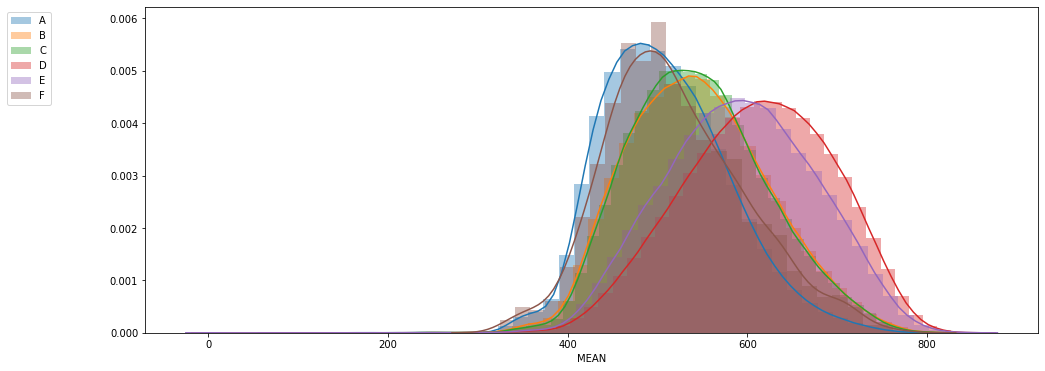

In [47]:
plt.figure(figsize=(16, 6))
questao = microdados_enem.Q027
classes = sorted(microdados_enem.Q027.unique())
for classe_escola in classes:
    sns.distplot(microdados_enem[questao == classe_escola].MEAN, label=classe_escola)
plt.legend(bbox_to_anchor=(-0.1,1), loc='upper right')

### 3.4 E se olharmos para os alunos que atingiram a nota de corte para o curso de Medicina na Ampla Concorrência?

In [52]:
microdados_enem['MED_UFRJ_AC_LABEL'].value_counts()

0    3892957
1        710
Name: MED_UFRJ_AC_LABEL, dtype: int64

In [50]:
X_MED_AC = microdados_enem[microdados_enem.MED_UFRJ_AC_LABEL == 1]

Segundo a renda mensal:

In [53]:
data = X_MED_AC.Q006.value_counts(sort=False).sort_values(ascending=False).to_dict()

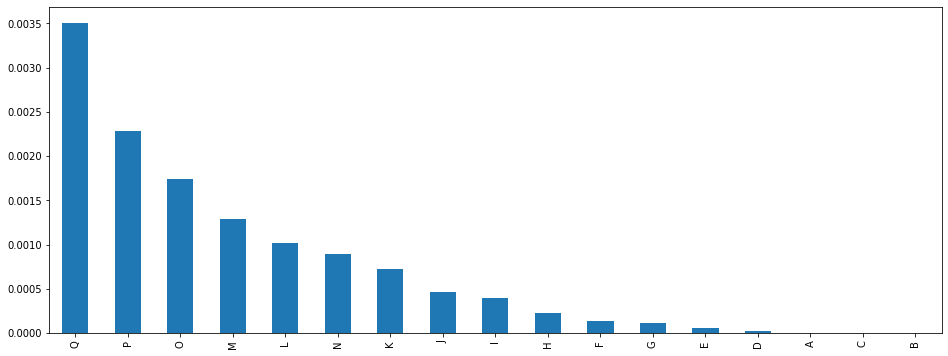

In [54]:
plt.figure(figsize=(16, 6))

(X_MED_AC.Q006.value_counts()/microdados_enem.Q006.value_counts(sort=False)).sort_values(ascending=False).plot(kind='bar')

In [61]:
dataRenda = X_MED_AC.Q006.value_counts(sort=False).sort_values(ascending=False).to_dict()

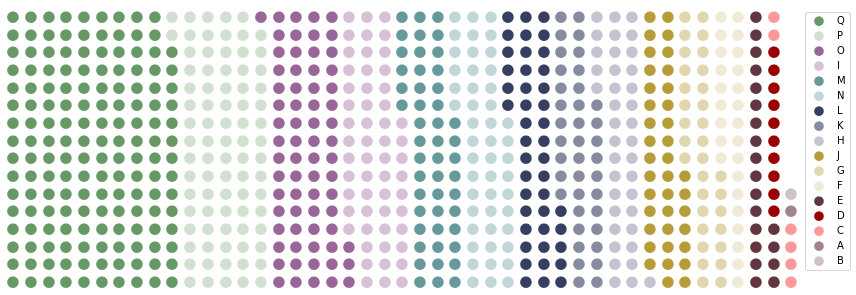

In [67]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=16, 
    values=dataRenda, 
    colors=("#669966", "#d1e0d1","#996699", "#d6c1d6",
            "#669999", "#c1d6d6", "#363e62", "#868ba0",
            "#c2c5cf" , "#b69d39","#e1d7af", "#f0ebd7",
            "#62363e","#990000","#ff9999", "#a0868b", "#cfc2c5"
           ),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
    font_size=12,
    icons='circle',
    icon_legend=True,
    figsize=(12, 6)
)

Segundo a escolaridade da mãe:

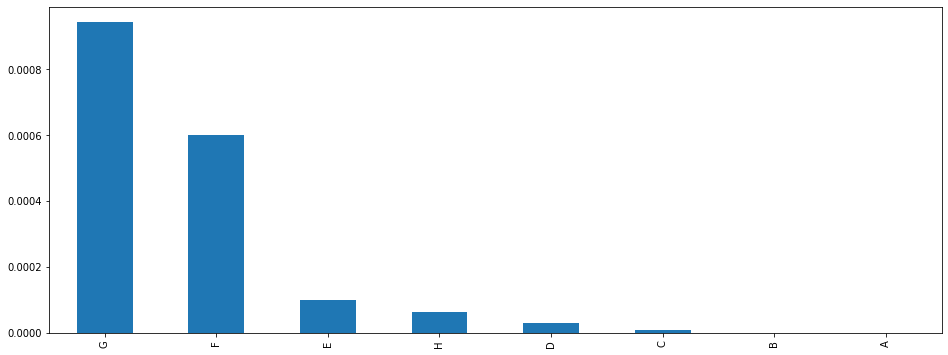

In [55]:
plt.figure(figsize=(16, 6))
(X_MED_AC.Q002.value_counts()/microdados_enem.Q002.value_counts(sort=False)).sort_values(ascending=False).plot(kind='bar')

In [56]:
dataMae = X_MED_AC.Q002.value_counts(sort=False).sort_values(ascending=False).to_dict()

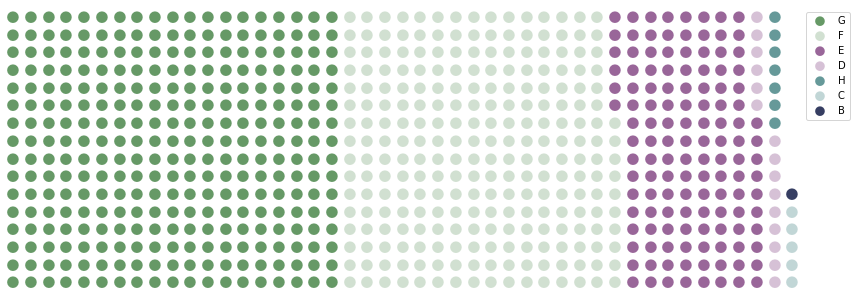

In [57]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=16, 
    values=dataMae, 
    colors=("#669966", "#d1e0d1","#996699", "#d6c1d6",
            "#669999", "#c1d6d6", "#363e62" ),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
    font_size=12,
    icons='circle',
    icon_legend=True,
    figsize=(12, 6)
)

Segundo o sexo declarado:

In [58]:
dataSexo = X_MED_AC.TP_SEXO.value_counts(sort=False).sort_values(ascending=False).to_dict()

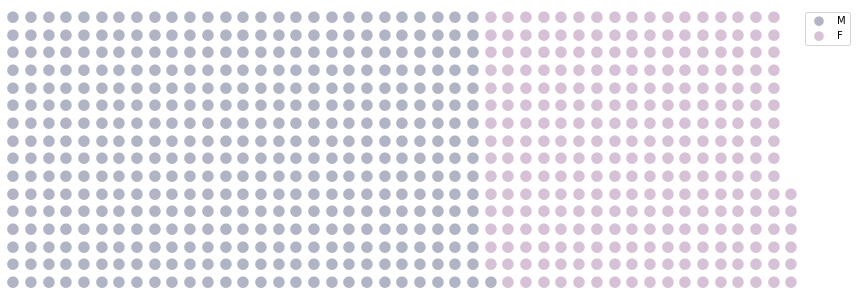

In [59]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=16, 
    values=dataSexo, 
    colors=( "#b1b4c4", "#d6c1d6" ),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='circle', 
    font_size=12, 
    icon_legend=True,
    figsize=(12, 6)
)